In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("AB_NYC_2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.shape

(48895, 16)

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


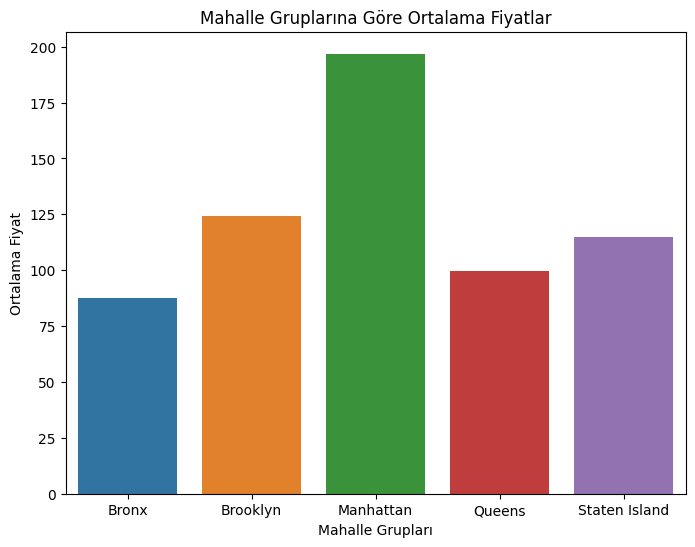

In [18]:
neighborhood_groups = df.groupby('neighbourhood_group')['price'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood_group', y='price', data=neighborhood_groups)
plt.title('Mahalle Gruplarına Göre Ortalama Fiyatlar')
plt.xlabel('Mahalle Grupları')
plt.ylabel('Ortalama Fiyat')
plt.show()

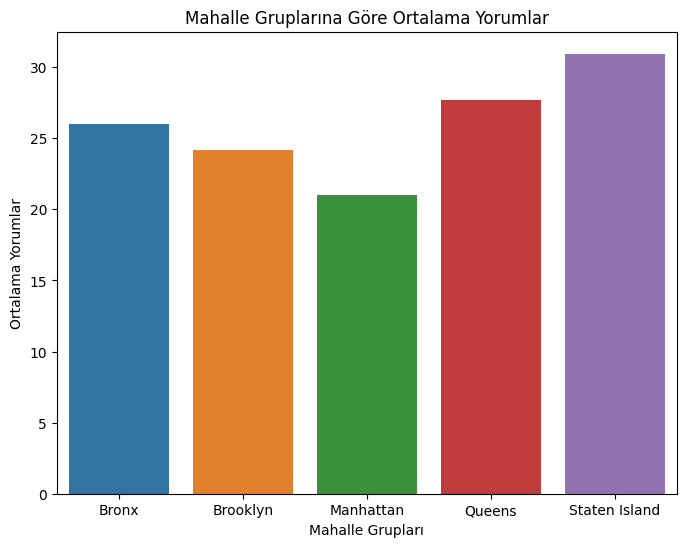

In [68]:
neighborhood_groups = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=neighborhood_groups)
plt.title('Mahalle Gruplarına Göre Ortalama Yorumlar')
plt.xlabel('Mahalle Grupları')
plt.ylabel('Ortalama Yorumlar')
plt.show()

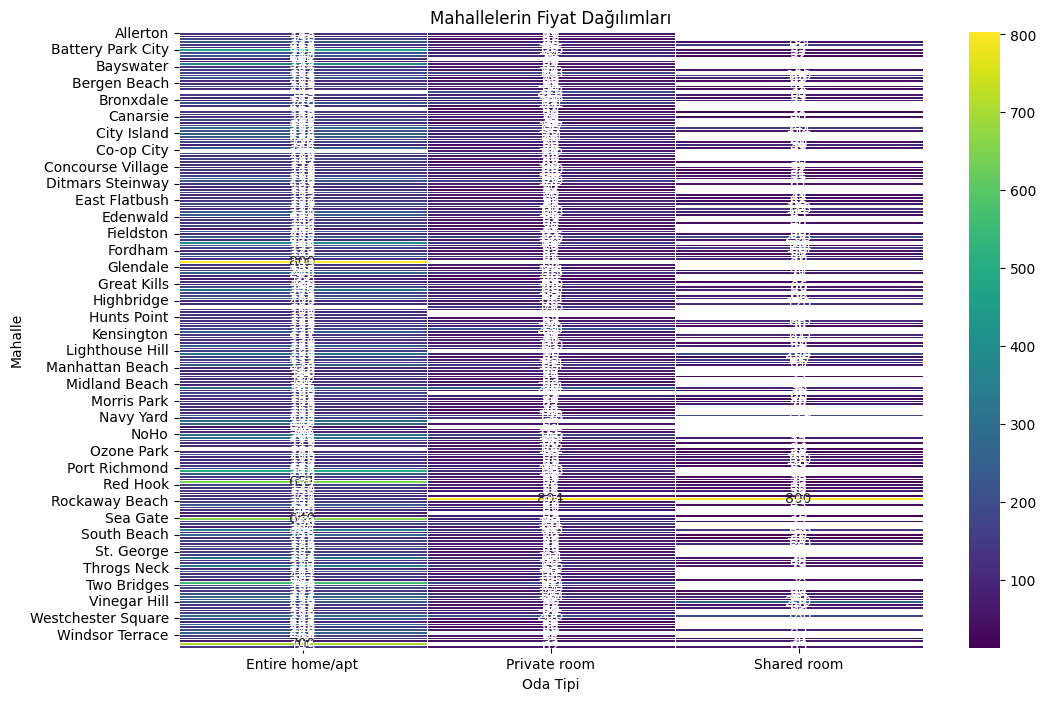

In [34]:

pivot_df = df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Mahallelerin Fiyat Dağılımları')
plt.xlabel('Oda Tipi')
plt.ylabel('Mahalle')
plt.show()

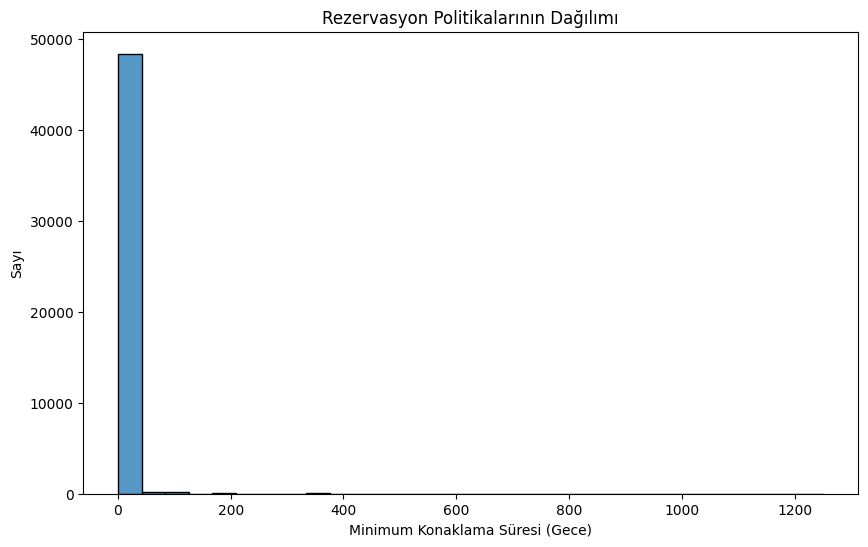

In [21]:

plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=30, kde=False)
plt.title('Rezervasyon Politikalarının Dağılımı')
plt.xlabel('Minimum Konaklama Süresi (Gece)')
plt.ylabel('Sayı')
plt.show()

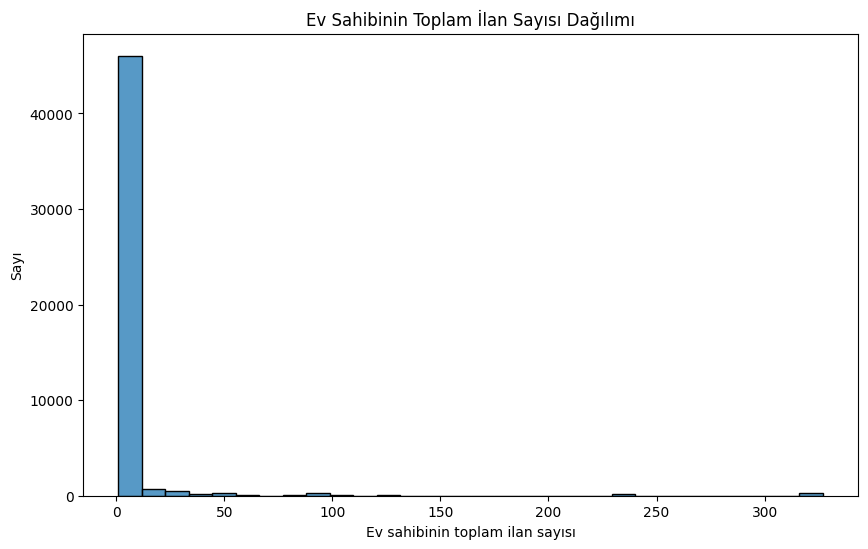

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], bins=30, kde=False)
plt.title('Ev Sahibinin Toplam İlan Sayısı Dağılımı')
plt.xlabel('Ev sahibinin toplam ilan sayısı')
plt.ylabel('Sayı')
plt.show()

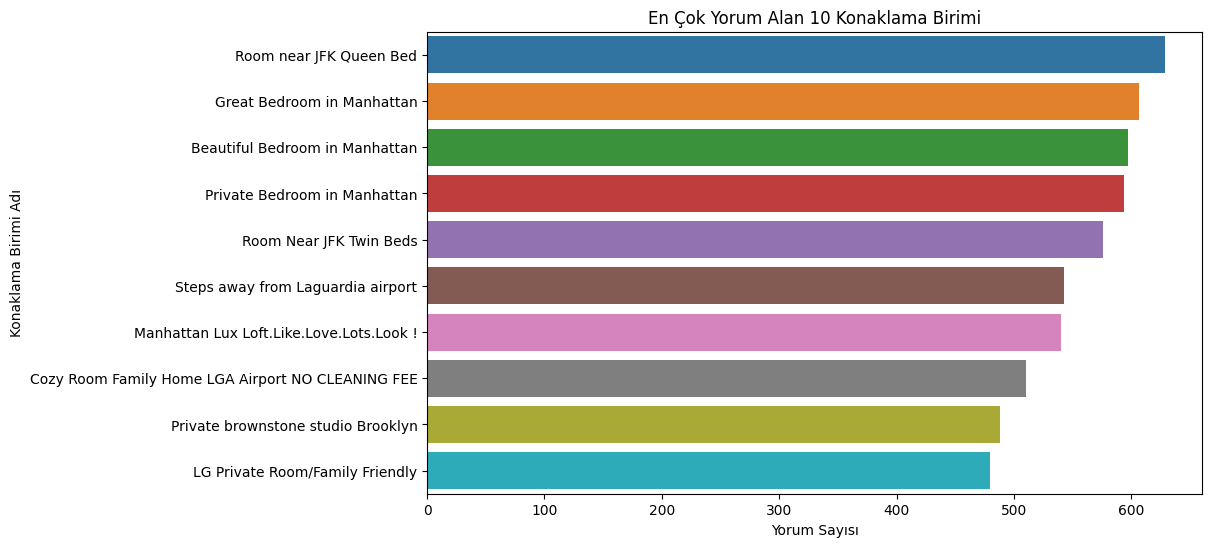

In [22]:

top_reviewed = df.nlargest(10, 'number_of_reviews')[['name', 'number_of_reviews']]
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_reviews', y='name', data=top_reviewed, orient='h')
plt.title('En Çok Yorum Alan 10 Konaklama Birimi')
plt.xlabel('Yorum Sayısı')
plt.ylabel('Konaklama Birimi Adı')
plt.show()

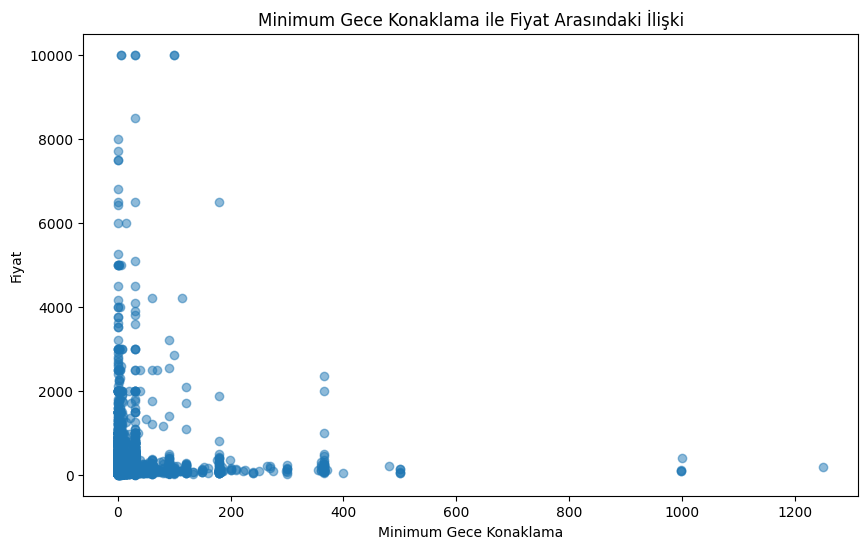

In [61]:

plt.figure(figsize=(10, 6))
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5)
plt.title('Minimum Gece Konaklama ile Fiyat Arasındaki İlişki')
plt.xlabel('Minimum Gece Konaklama')
plt.ylabel('Fiyat')
plt.show()

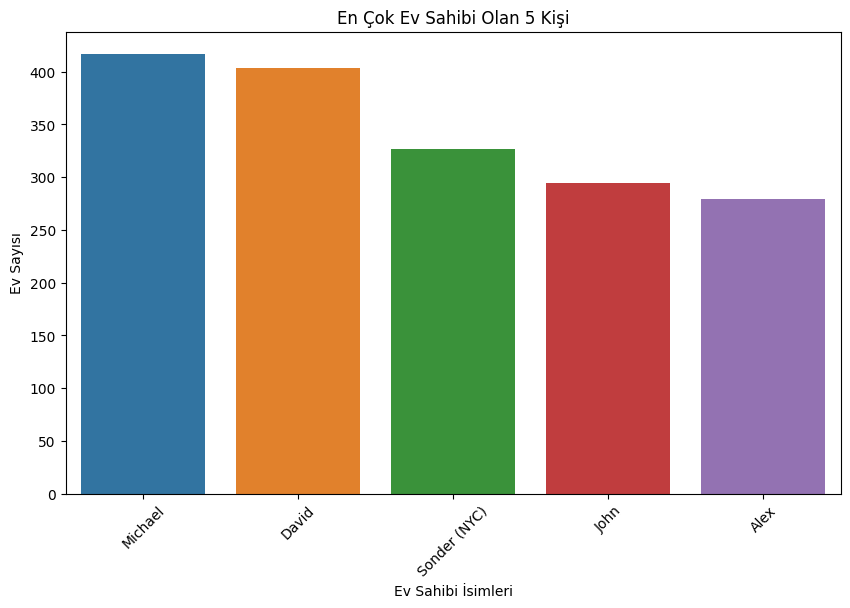

In [25]:

top_host_names = df['host_name'].value_counts().nlargest(5)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_host_names.index, y=top_host_names.values)
plt.title('En Çok Ev Sahibi Olan 5 Kişi')
plt.xlabel('Ev Sahibi İsimleri')
plt.ylabel('Ev Sayısı')
plt.xticks(rotation=45)
plt.show()


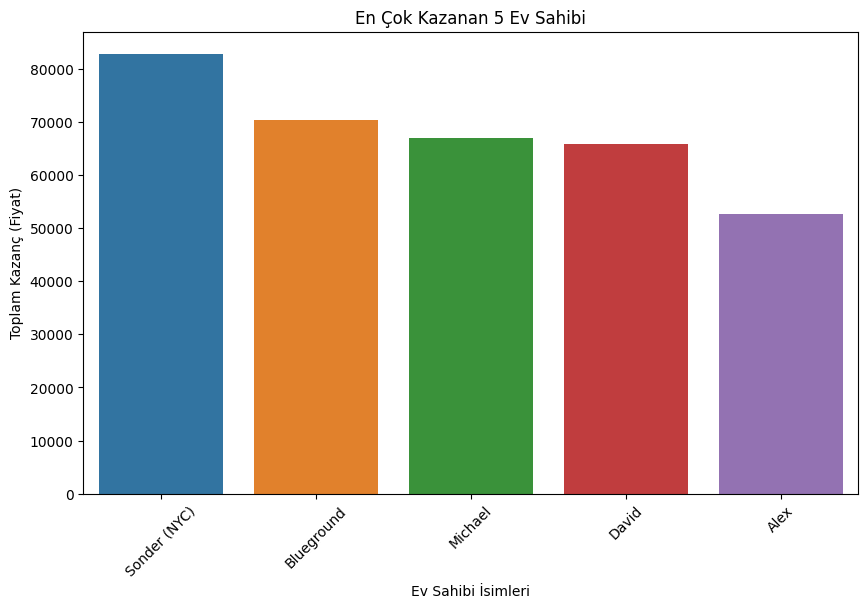

In [29]:
host_total_earnings = df.groupby("host_name")["price"].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=host_total_earnings.index, y=host_total_earnings.values)
plt.title('En Çok Kazanan 5 Ev Sahibi')
plt.xlabel('Ev Sahibi İsimleri')
plt.ylabel('Toplam Kazanç (Fiyat)')
plt.xticks(rotation=45)
plt.show()

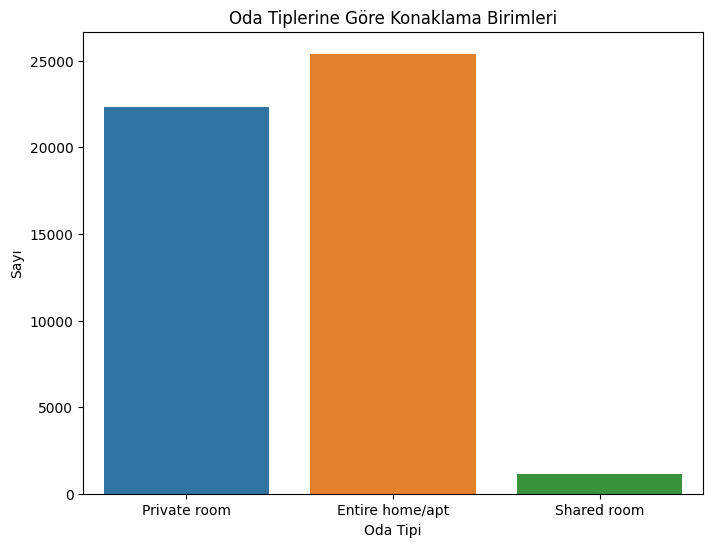

In [32]:

plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Oda Tiplerine Göre Konaklama Birimleri')
plt.xlabel('Oda Tipi')
plt.ylabel('Sayı')
plt.show()

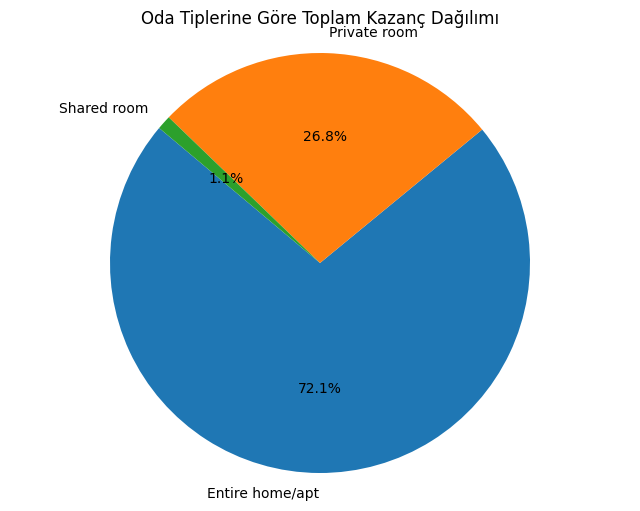

In [31]:

room_type_total_earnings = df.groupby("room_type")["price"].sum()


plt.figure(figsize=(8, 6))
plt.pie(room_type_total_earnings, labels=room_type_total_earnings.index, autopct='%1.1f%%', startangle=140)
plt.title('Oda Tiplerine Göre Toplam Kazanç Dağılımı')
plt.axis('equal')
plt.show()

C:\Users\iremu\AppData\Local\Temp\ipykernel_10812\2816474444.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=df_top_reviews, ci=None)


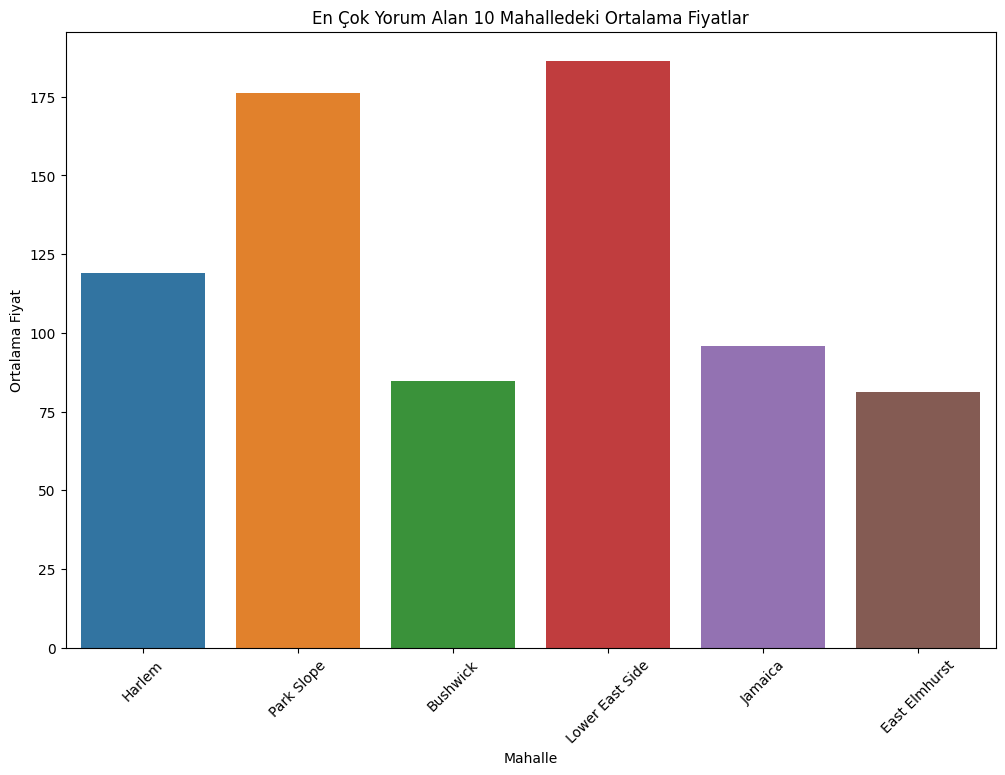

In [36]:

top_reviewed_neighbourhoods = df.nlargest(10, 'number_of_reviews')['neighbourhood']
df_top_reviews = df[df['neighbourhood'].isin(top_reviewed_neighbourhoods)]
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='price', data=df_top_reviews, ci=None)
plt.title('En Çok Yorum Alan 10 Mahalledeki Ortalama Fiyatlar')
plt.xlabel('Mahalle')
plt.ylabel('Ortalama Fiyat')
plt.xticks(rotation=45)
plt.show()

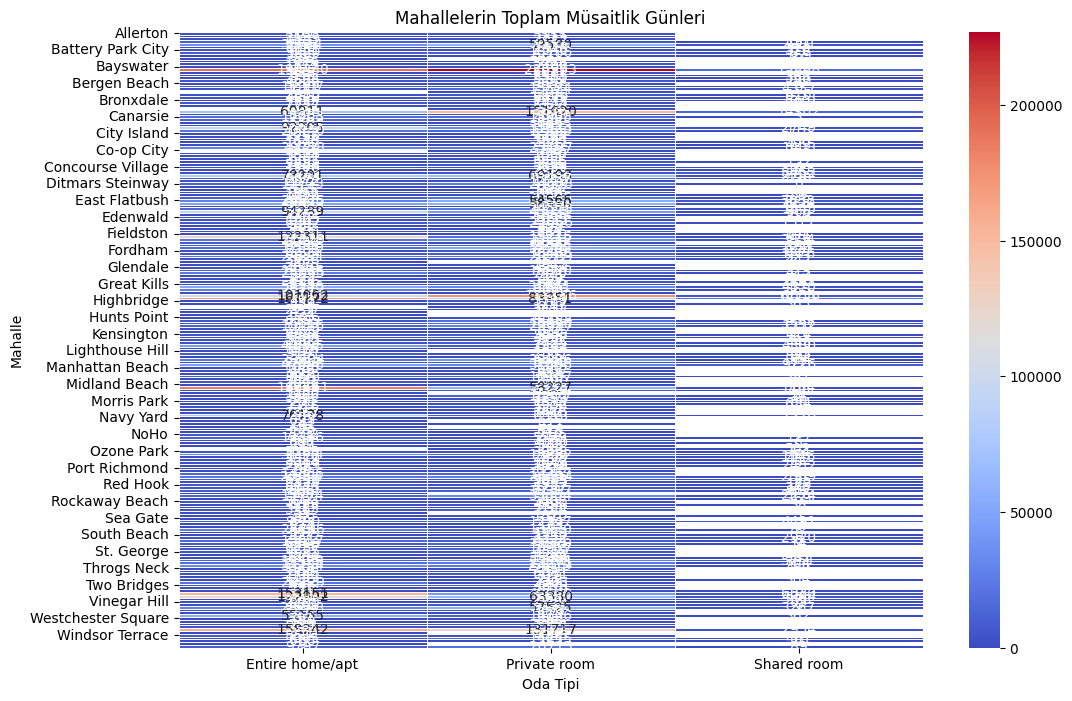

In [38]:
pivot_df_avail = df.pivot_table(index='neighbourhood', columns='room_type', values='availability_365', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df_avail, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Mahallelerin Toplam Müsaitlik Günleri')
plt.xlabel('Oda Tipi')
plt.ylabel('Mahalle')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Astoria'),
  Text(1, 0, 'Greenpoint'),
  Text(2, 0, 'Upper West Side'),
  Text(3, 0, 'East Harlem'),
  Text(4, 0, 'Lower East Side'),
  Text(5, 0, 'Tribeca'),
  Text(6, 0, 'Clinton Hill'),
  Text(7, 0, 'Upper East Side'),
  Text(8, 0, 'Battery Park City')])

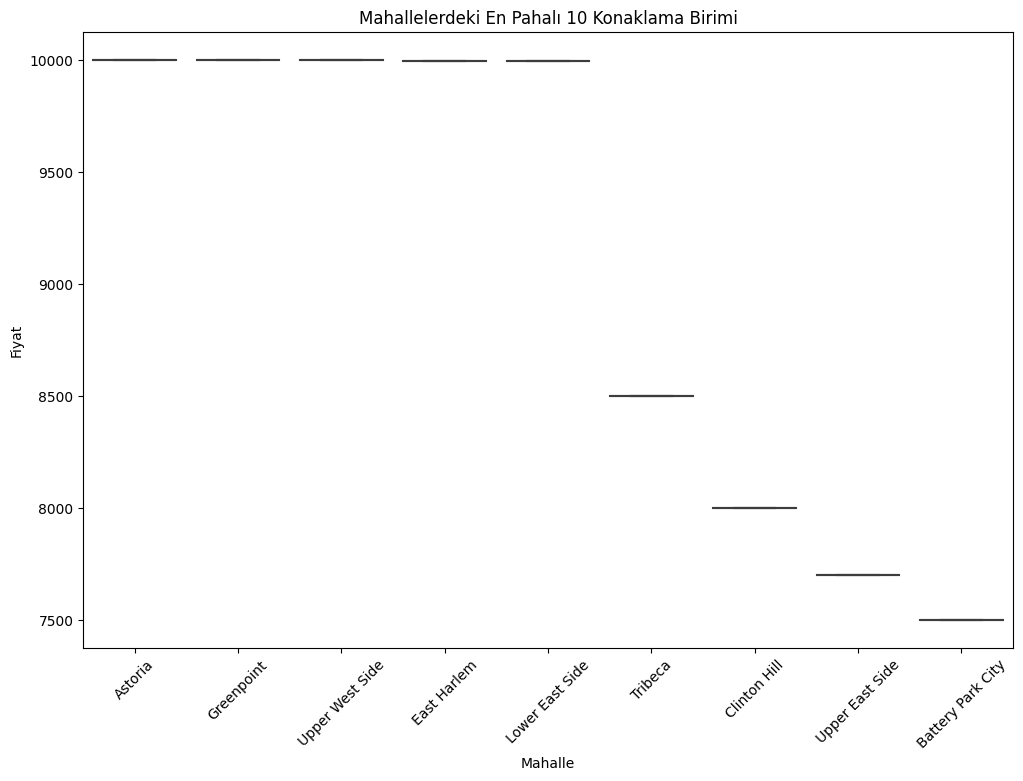

In [39]:
top_expensive_listings = df.nlargest(10, 'price')[['neighbourhood', 'name', 'price']]
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=top_expensive_listings)
plt.title('Mahallelerdeki En Pahalı 10 Konaklama Birimi')
plt.xlabel('Mahalle')
plt.ylabel('Fiyat')
plt.xticks(rotation=45)

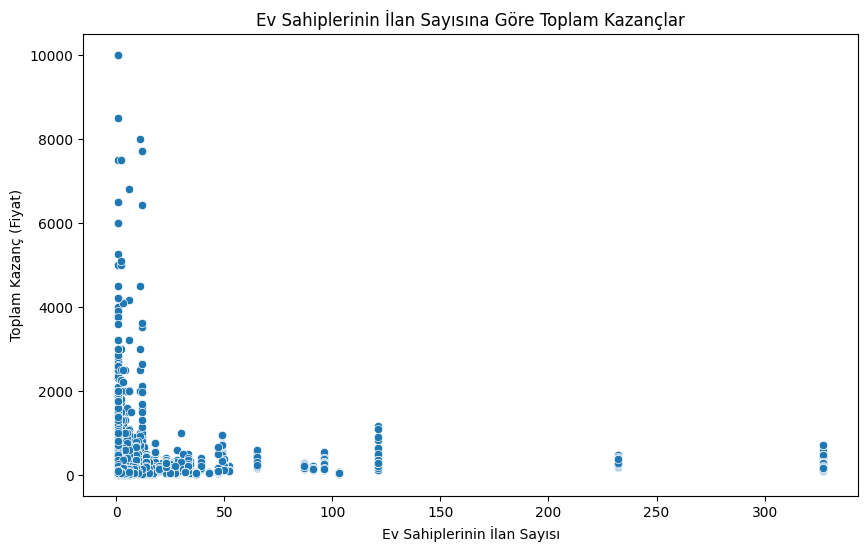

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calculated_host_listings_count', y='price', data=df)
plt.title('Ev Sahiplerinin İlan Sayısına Göre Toplam Kazançlar')
plt.xlabel('Ev Sahiplerinin İlan Sayısı')
plt.ylabel('Toplam Kazanç (Fiyat)')
plt.show()

<Figure size 1200x800 with 0 Axes>

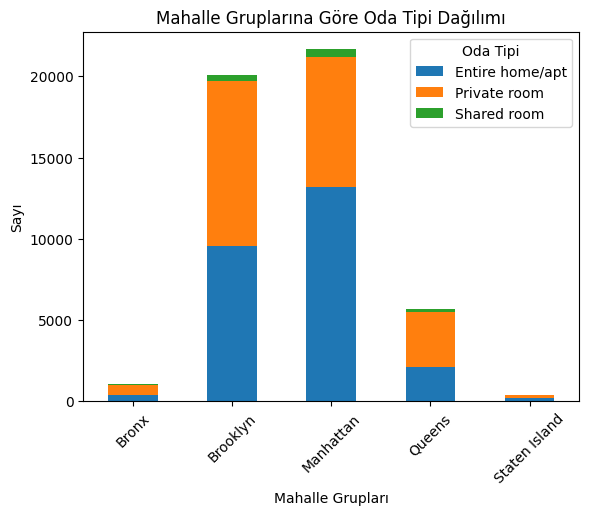

In [48]:

room_type_distribution = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()


plt.figure(figsize=(12, 8))
room_type_distribution.plot(kind='bar', stacked=True)
plt.title('Mahalle Gruplarına Göre Oda Tipi Dağılımı')
plt.xlabel('Mahalle Grupları')
plt.ylabel('Sayı')
plt.legend(title='Oda Tipi', loc='upper right')
plt.xticks(rotation=45)
plt.show()

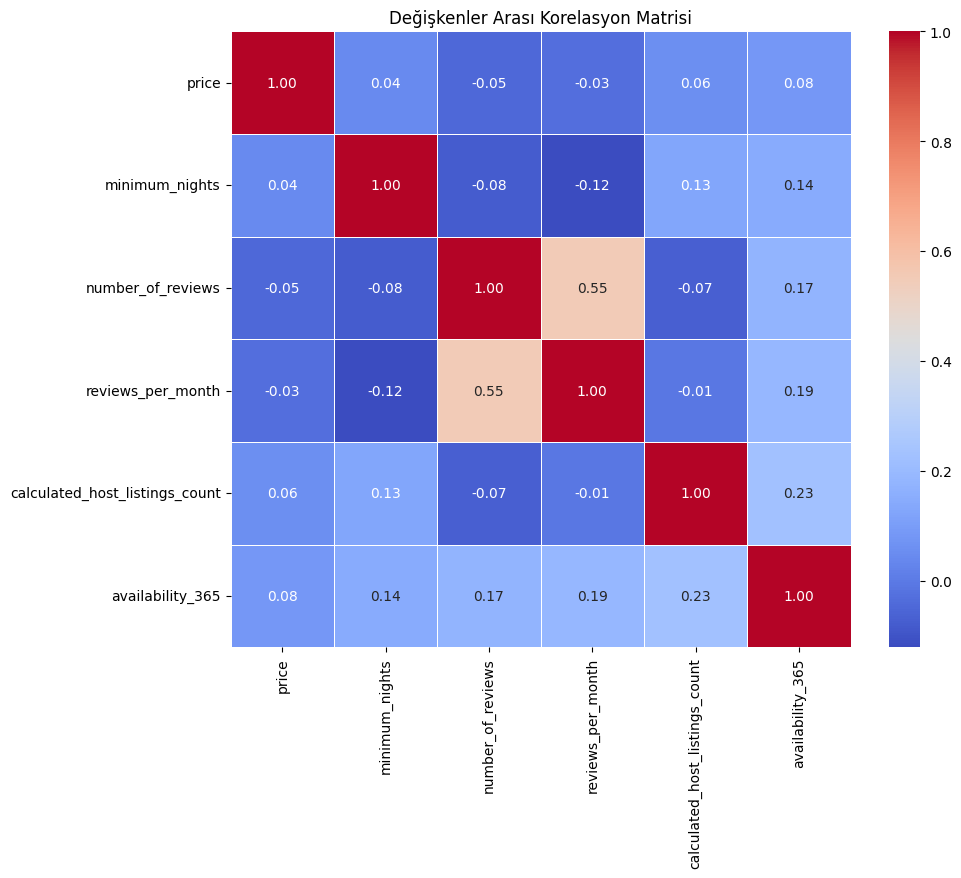

In [54]:
selected_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
selected_df = df[selected_columns]


correlation_matrix = selected_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()